<a href="https://colab.research.google.com/github/janith763/AI-CODING-ASSESSMENT-file-/blob/main/AI_CODING_ASSESSMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (20, 4)

Columns: ['sender', 'subject', 'body', 'sent_date']

Missing values:
 sender       0
subject      0
body         0
sent_date    0
dtype: int64

First 5 rows:
               sender                                     subject  \
0     eve@startup.io     Help required with account verification   
1    diana@client.co            General query about subscription   
2     eve@startup.io  Immediate support needed for billing error   
3  alice@example.com       Urgent request: system access blocked   
4     eve@startup.io              Question: integration with API   

                                                body            sent_date  
0  Do you support integration with third-party AP...  2025-08-19 00:58:09  
1  Hi team, I am unable to log into my account si...  2025-08-25 00:58:09  
2  Hello, I wanted to understand the pricing tier...  2025-08-20 12:58:09  
3  Hi team, I am unable to log into my account si...  2025-08-21 21:58:09  
4  Despite multiple attempts, I cann

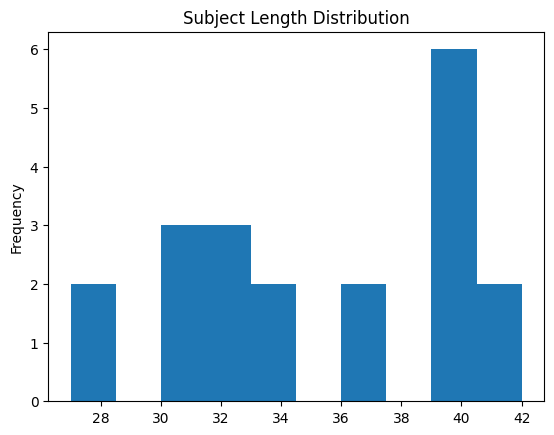

✅ Submission file saved as submission.csv
              sender                                     subject  \
0     eve@startup.io     Help required with account verification   
1    diana@client.co            General query about subscription   
2     eve@startup.io  Immediate support needed for billing error   
3  alice@example.com       Urgent request: system access blocked   
4     eve@startup.io              Question: integration with API   

                                                body                   topic  \
0  Do you support integration with third-party AP...     API/General Queries   
1  Hi team, I am unable to log into my account si...     Login/Access Issues   
2  Hello, I wanted to understand the pricing tier...  Billing/Payment Issues   
3  Hi team, I am unable to log into my account si...     Login/Access Issues   
4  Despite multiple attempts, I cannot reset my p...  Billing/Payment Issues   

  urgency  
0  Urgent  
1  Normal  
2  Urgent  
3  Urgent  
4  Norma

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk

# Load dataset
df = pd.read_csv("68b1acd44f393_Sample_Support_Emails_Dataset (1).csv")

# ==============================
# STEP 1: Basic EDA
# ==============================
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

print("\nNumber of unique senders:", df['sender'].nunique())
print("\nTop 5 senders:\n", df['sender'].value_counts().head())

df['subject_len'] = df['subject'].astype(str).apply(len)
df['body_len'] = df['body'].astype(str).apply(len)

print("\nAverage subject length:", df['subject_len'].mean())
print("Average body length:", df['body_len'].mean())

df['subject_len'].plot(kind='hist', bins=10, title="Subject Length Distribution")
plt.show()

# ==============================
# STEP 2: Combine subject + body & clean text
# ==============================
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# 1. Combine subject + body into a single column "text"
df["text"] = df["subject"].fillna("") + " " + df["body"].fillna("")

# 2. Convert text to lowercase
df["clean_text"] = df["text"].str.lower()

# 3. Remove special characters and numbers (keep only letters and spaces)
df["clean_text"] = df["clean_text"].apply(lambda x: re.sub(r"[^a-z\s]", "", x))

# 4. Remove stopwords (like 'the', 'is', 'and')
df["clean_text"] = df["clean_text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)
# ==============================
# STEP 3: Urgency detection
# ==============================
urgent_words = ["urgent", "immediate", "asap", "help", "blocked", "error"]

df['urgency'] = df['subject'].astype(str).str.lower().apply(
    lambda x: "Urgent" if any(word in x for word in urgent_words) else "Normal"
)

# ==============================
# STEP 4: Topic Clustering
# ==============================
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
X = vectorizer.fit_transform(df['clean_text'])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['topic_cluster'] = kmeans.fit_predict(X)

# rename clusters manually after checking common words
topic_map = {
    0: "Login/Access Issues",
    1: "Billing/Payment Issues",
    2: "API/General Queries"
}
df['topic'] = df['topic_cluster'].map(topic_map)

# ==============================
# STEP 5: Save Submission File
# ==============================
submission = df[['sender', 'subject', 'body', 'topic', 'urgency']]
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as submission.csv")
print(submission.head())
